








## Importing Libraries

In [90]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# preprocessing
#from feature_engine.discretisation import EqualWidthDiscretiser

from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler


from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier


## Data Preparation

In [36]:
# Creating a dataframe and loading the data into it.
df = pd.read_csv("test3_data.csv")

In [3]:
# The number of rows and columns in the dataframe
df.shape

(1000000, 9)

In [4]:
# Brief view of the dataframe
df.head()

,Unnamed: 0,ID,ActionTime,Action,Website,BannerSize,Brand,colour,InteractionTime
0,1,AMsySZbNg8SBwPtj7IGHnip_8aY0,1508761859495365,View,Facebook,300x600,Carter's,Pink,0.171601
1,2,AMsySZZcUFNGOJs-lfC9j-ZDlV7Z,1502847469736117,View,Facebook,300x250,Burberry,Red,4.303945
2,3,AMsySZYoK8_bD0hGv4zu0iRn1TFo,1514169431528120,View,Facebook,728x90,Disney,Yellow,0.868106
3,4,AMsySZahxpwLOWnMJj6RGATgwEOc,1515527952591896,View,Facebook,320x50,Carter's,Yellow,0.802647
4,5,AMsySZbqgfMBDtAqZz1jVRaOmX00,1507514809374045,View,instagram.com,300x250,Gap,Gold,0.627148


In [5]:
# The unique number of types of Actions
df['Action'].unique()

array(['View', 'Click'], dtype=object)

In [6]:
# The unique number of types of websites
df['Website'].unique()

array(['Facebook', 'instagram.com', 'Kijiji', 'Sympatico', 'Atedra',
       'Amazon', 'Other', 'Twitter', 'Yahoo', 'TubeMogul',
       'Craigslist.ca', 'Expedia', 'AOL', 'Youtube', 'Weather', 'Wayfair'],
      dtype=object)

In [7]:
# The unique number of types of Banner Sizes
df['BannerSize'].unique()

array(['300x600', '300x250', '728x90', '320x50', '160x600', '1x1',
       'Other', '1200x627', '320x480', '300x50', '320x100', '768x1024',
       '1536x2048', '750x125', 'other'], dtype=object)

In [8]:
# The unique number of types of Brands
df['Brand'].unique()

array(["Carter's", 'Burberry', 'Disney', 'Gap', 'gymboree', 'Old Navy',
       'JoeFresh', 'Banana Republic', "The Children's Place", 'Zara'],
      dtype=object)

In [9]:
# The unique number of types of colours
df['colour'].unique()

array(['Pink', 'Red', 'Yellow', 'Gold', 'Blue', 'White', 'other'],
      dtype=object)

In [37]:
# Dropping rows with NaN values in place
df.dropna(inplace=True)

In [38]:
# Dropping the duplicate values
df.drop_duplicates

<bound method DataFrame.drop_duplicates of         Unnamed: 0                            ID        ActionTime Action  \
0                1  AMsySZbNg8SBwPtj7IGHnip_8aY0  1508761859495365   View   
1                2  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  1502847469736117   View   
2                3  AMsySZYoK8_bD0hGv4zu0iRn1TFo  1514169431528120   View   
3                4  AMsySZahxpwLOWnMJj6RGATgwEOc  1515527952591896   View   
4                5  AMsySZbqgfMBDtAqZz1jVRaOmX00  1507514809374045   View   
...            ...                           ...               ...    ...   
999995      999996  AMsySZY-9Mzh_xjk57_PBNO_8QRO  1508108130372165   View   
999996      999997  AMsySZY-KoDAx1qJv15SZ9lKO2QF  1516760241253562   View   
999997      999998  AMsySZZGRYHeXVjPP2Rr6F-kjFc3  1502841951670170   View   
999998      999999  AMsySZaSAhXiCSGhaCLWcoLse-0i  1517068511614322   View   
999999     1000000  AMsySZYRh7zkkDPtcrGdXEbM_M0f  1505855363538153   View   

              Website BannerSize

In [12]:
# List of the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999992 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       999992 non-null  int64  
 1   ID               999992 non-null  object 
 2   ActionTime       999992 non-null  int64  
 3   Action           999992 non-null  object 
 4   Website          999992 non-null  object 
 5   BannerSize       999992 non-null  object 
 6   Brand            999992 non-null  object 
 7   colour           999992 non-null  object 
 8   InteractionTime  999992 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 76.3+ MB


In [13]:
# Basic statistics for each numeric column
df.describe()

,Unnamed: 0,ActionTime,InteractionTime
count,999992.000000,9.999920e+05,999992.000000
mean,500003.130244,1.508367e+15,0.998667
std,288674.575682,4.362766e+12,0.998170
min,1.000000,1.500991e+15,0.000002
25%,250004.750000,1.505164e+15,0.288696
50%,500004.500000,1.507718e+15,0.693044
75%,750002.250000,1.511500e+15,1.382822
max,1000000.000000,1.517358e+15,13.385281


### The average action time for a customer to click or view is 1.508367e+15 microseconds and the average interaction time is 0.998667 seconds

In [14]:
# Basic statistics for each object column
df.describe(include=['O'])

,ID,Action,Website,BannerSize,Brand,colour
count,999992,999992,999992,999992,999992,999992
unique,218686,2,16,15,10,7
top,AMsySZaSHnOuwfEjIHSMTU237tQS,View,Facebook,300x250,Carter's,Pink
freq,2231,999753,600131,408703,222634,322834


In [15]:
# Checking for missing values
df.isna().sum()

Unnamed: 0         0
ID                 0
ActionTime         0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    0
dtype: int64

In [39]:
# Converting the datatypes to category
df['ID'].astype('category')
df['Action'].astype('category')
df['Website'].astype('category')
df['BannerSize'].astype('category')
df['Brand'].astype('category')
df['colour'].astype('category')

0           Pink
1            Red
2         Yellow
3         Yellow
4           Gold
           ...  
999995    Yellow
999996    Yellow
999997      Pink
999998      Pink
999999      Pink
Name: colour, Length: 999992, dtype: category
Categories (7, object): ['Blue', 'Gold', 'Pink', 'Red', 'White', 'Yellow', 'other']

## EDA Process

In [18]:
# The data distribution of the label column
df['Action'].value_counts(normalize=False)

View     999753
Click       239
Name: Action, dtype: int64

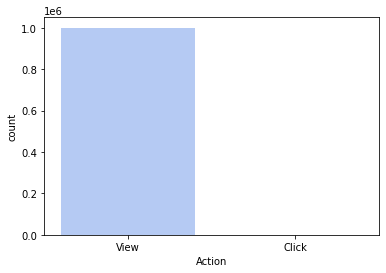

In [19]:
# Plotting the value counts of the label to show the imbalance in dataset
sns.countplot(data=df, x='Action', palette='coolwarm');

### The bar graph of the Click cannot be seen because the comparetively the value count of Click is way lower than the value count of View

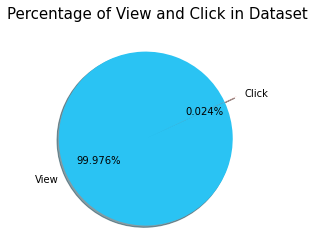

In [28]:
# The distribution of the value counts from the label column in terms of percentage in a pie chart
sizes = df['Action'].value_counts(sort=True)
colors = ['#2ac3f3', '#f37768'] 
explode = [0.15, 0]
labels= ['View', 'Click']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda p: f'{p:.3f}%', shadow=True, startangle=25)
plt.title('Percentage of View and Click in Dataset', fontsize=15)
plt.show();

In [9]:
# Colours for presentation of the graphs
pres_pal = ['#2ac3f3', '#f37768']

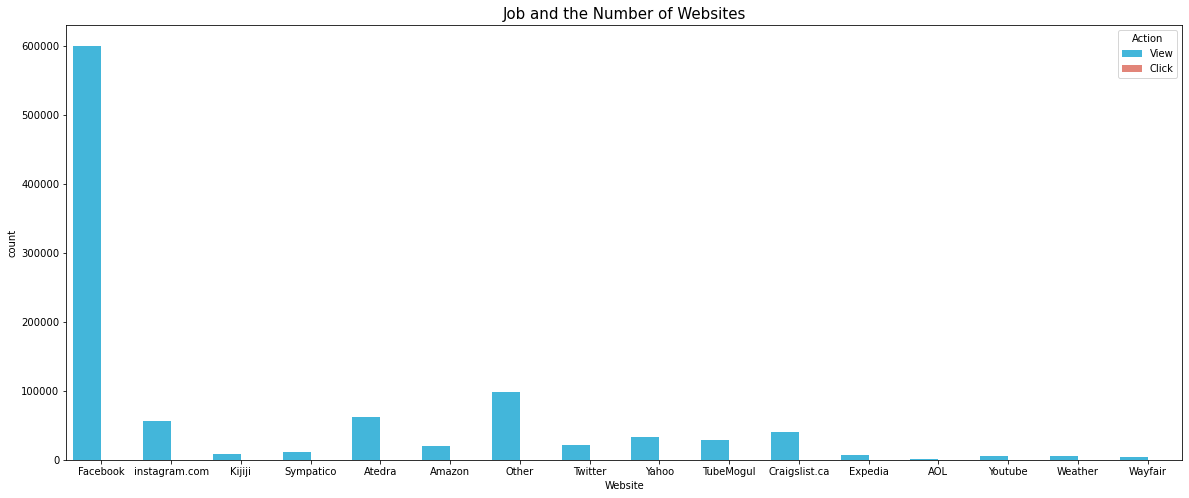

In [42]:
# Distribution of the Website and the number of View/Click on each website
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Website', hue='Action',  palette=pres_pal)
plt.title('Action and the Number of Websites', fontsize=15);

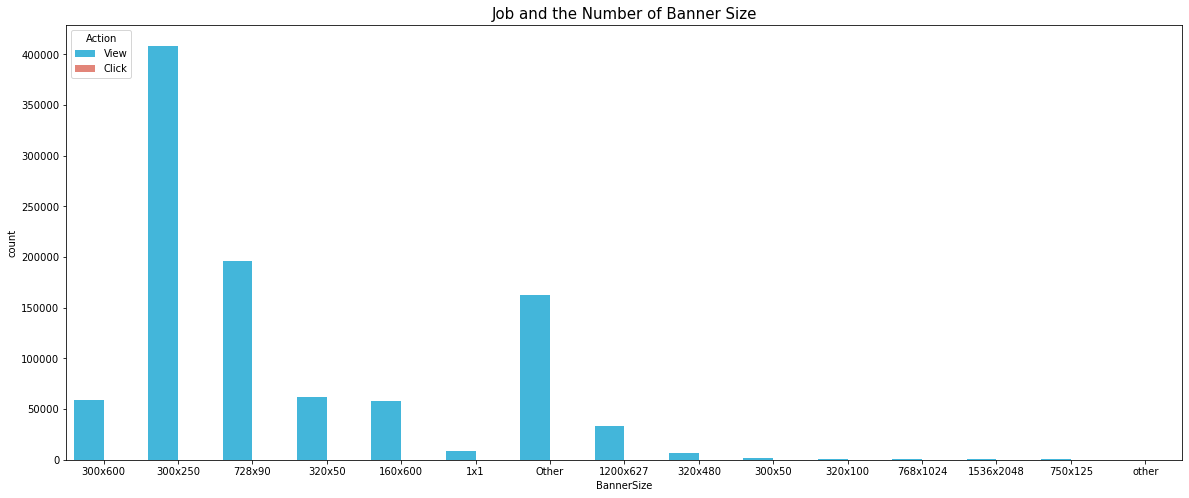

In [44]:
# Distribution of the Banner Size and the number of View/Click on each Banner Size
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='BannerSize', hue='Action',  palette=pres_pal)
plt.title('Action and the Number of Banner Size', fontsize=15);

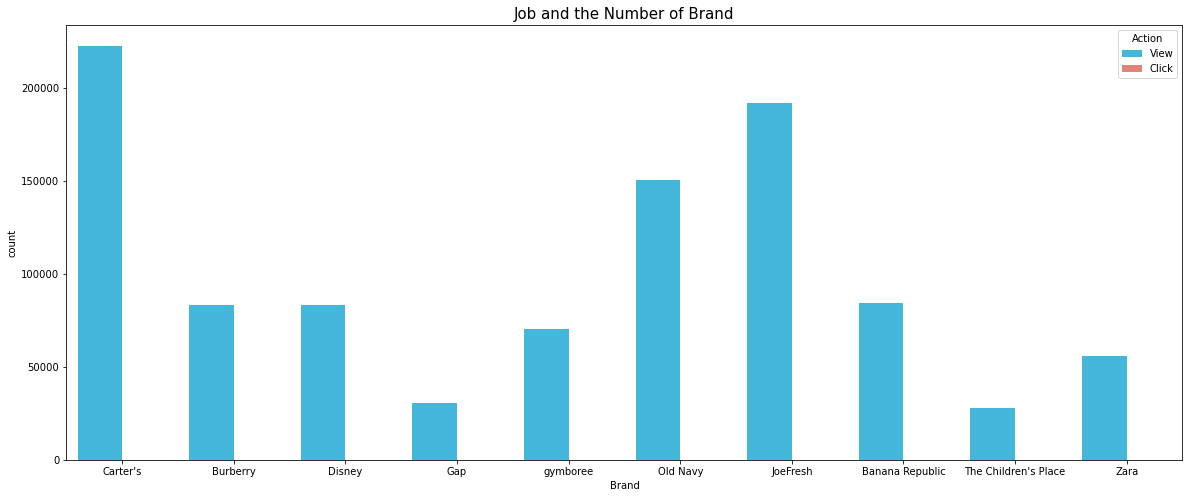

In [45]:
# Distribution of the Brand and the number of View/Click on each Brands
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Brand', hue='Action',  palette=pres_pal)
plt.title('Action and the Number of Brand', fontsize=15);

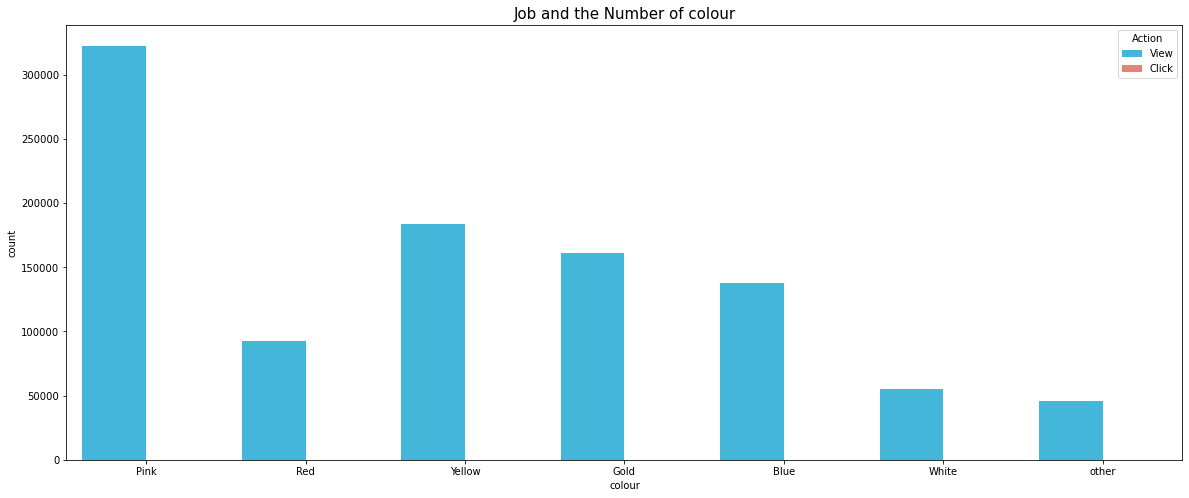

In [46]:
# Distribution of the colour and the number of View/Click on each colour
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='colour', hue='Action',  palette=pres_pal)
plt.title('Action and the Number of colour', fontsize=15);

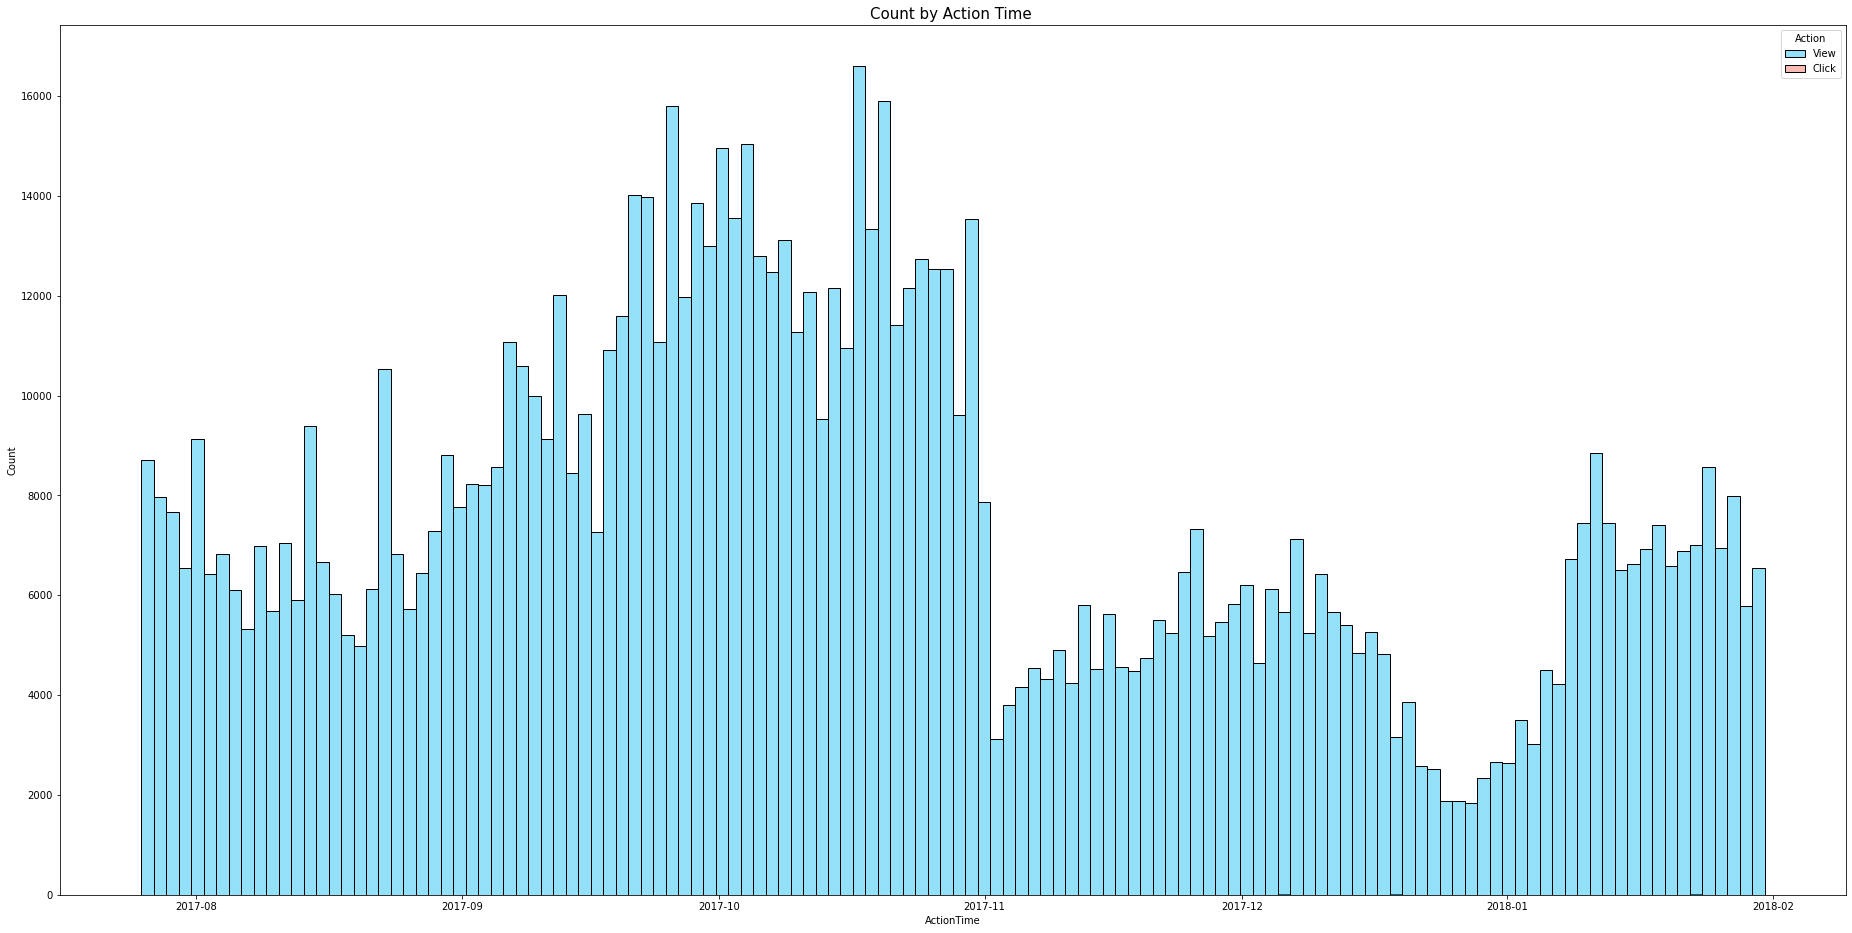

In [11]:
# Plotting the histographic view of the Action Time distribution based on click/view action
plt.figure(figsize=(32,16))
sns.histplot(data=df, x='ActionTime', hue='Action', palette=pres_pal)
plt.title('Count by Action Time ', fontsize=15)
plt.show();

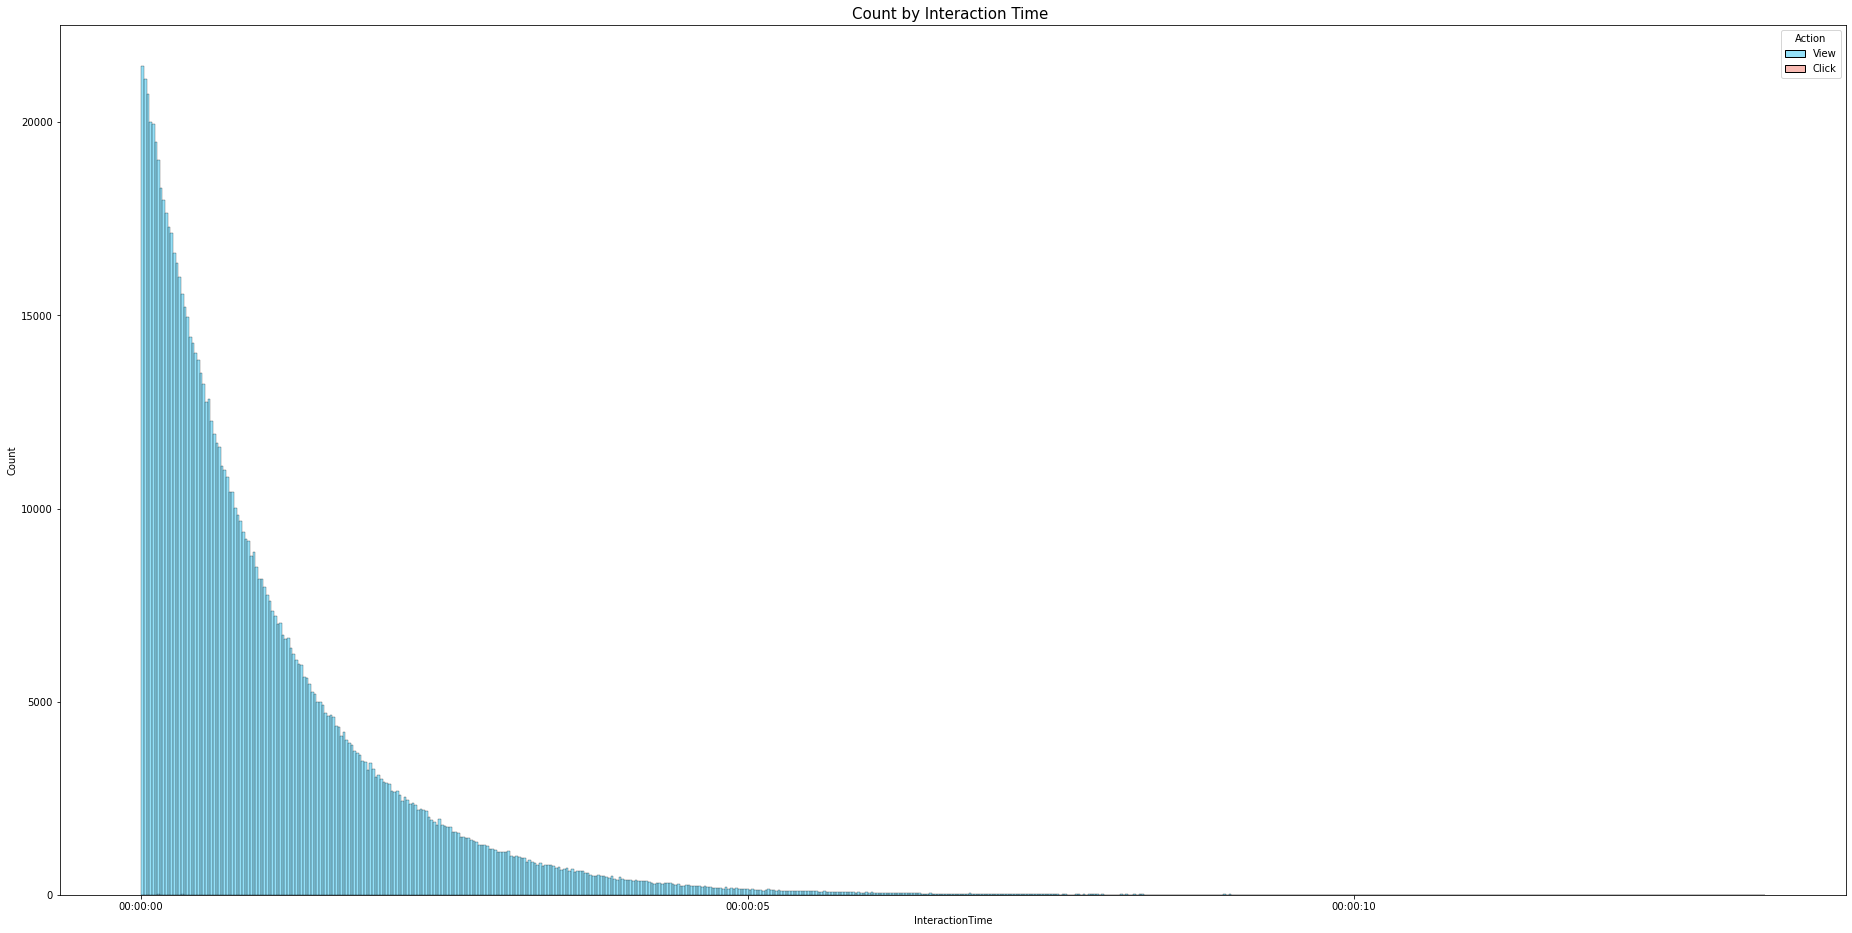

In [14]:
# Plotting the histographic view of the Interaction Time distribution based on click/view action
plt.figure(figsize=(32,16))
sns.histplot(data=df, x='InteractionTime', hue='Action', palette=pres_pal)
plt.title('Count by Interaction Time ', fontsize=15)
plt.show();

## Feature Selection 

In [41]:
# Column names to create features
df.columns

Index(['Unnamed: 0', 'ID', 'ActionTime', 'Action', 'Website', 'BannerSize',
       'Brand', 'colour', 'InteractionTime'],
      dtype='object')

### The 'Unnamed:0' column and the 'ID' column was dropped to avoid data leakage

### The ActionTime and InteractionTime column was initially used in features as test run, but because the machine learning model was not processing them as values that help affect the accuracy of the prediction these two columns were not used in features

In [54]:
# The choosen features for the machine learning model
features = ['Website', 'BannerSize',
       'Brand', 'colour']

In [55]:
# Creating a dataframe for the features (x) and labels (y)
X = df[features]
y = df['Action']

In [51]:
# Checking if all the respective values are convert into categorical
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999992 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ActionTime       999992 non-null  datetime64[ns]
 1   Website          999992 non-null  object        
 2   BannerSize       999992 non-null  object        
 3   Brand            999992 non-null  object        
 4   colour           999992 non-null  object        
 5   InteractionTime  999992 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 53.4+ MB


In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [57]:
# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((699994, 4), (299998, 4), (699994,), (299998,))

## Feature Engineering

In [58]:
# encoding our label to use it in the machine learning model
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [59]:
# Classifying the features into categorical features
cat_feature = [ 'Website', 'BannerSize','Brand', 'colour']


In [60]:
# Creating a pipeline for encoding categorical values
cat_pipeline = Pipeline([
    ('te',TargetEncoder())
])


# Using the ColumnTransformer to simultaneosuly run both categorical and numerical pipeline in the preprocessor
preprocessor = ColumnTransformer([
    ('cat',TargetEncoder(),cat_feature),
],remainder='passthrough')


## Select and Create Model

### Logistic Regression

In [61]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and LogisticRegression   
lr_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('lr',LogisticRegression())
])

In [62]:
# Fitting the data and predicting the data
lr_pipe.fit(X_train,y_train_enc)
y_ped = lr_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.00      0.19      0.00        72
           1       1.00      0.92      0.96    299926

    accuracy                           0.92    299998
   macro avg       0.50      0.56      0.48    299998
weighted avg       1.00      0.92      0.96    299998



### Decision Trees

In [63]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and DecisionTreeClassifier   
dt_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('dtc',DecisionTreeClassifier())
])

In [64]:
###### Fitting the data and predicting the data
dt_pipe.fit(X_train,y_train_enc)
y_ped = dt_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.00      0.22      0.00        72
           1       1.00      0.78      0.88    299926

    accuracy                           0.78    299998
   macro avg       0.50      0.50      0.44    299998
weighted avg       1.00      0.78      0.88    299998



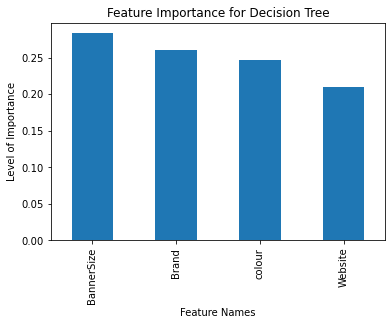

In [65]:
# Distribution of the feature importance based on Decision Tree model
pd.Series(dt_pipe.named_steps['dtc'].feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Feature Names')
plt.ylabel('Level of Importance');

## xgboost

In [68]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and XGBClassifier   
xgb_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('xgb',XGBClassifier())
])

In [69]:
# split the data into testing and training set
xgb_pipe.fit(X_train,y_train_enc)
y_ped = xgb_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.00      0.22      0.00        72
           1       1.00      0.78      0.87    299926

    accuracy                           0.78    299998
   macro avg       0.50      0.50      0.44    299998
weighted avg       1.00      0.78      0.87    299998



## Random Forest

In [71]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and RandomForestClassifier 
rfc_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('rfc',RandomForestClassifier())
])

In [72]:
# split the data into testing and training set
rfc_pipe.fit(X_train,y_train_enc)
y_ped = rfc_pipe.predict(X_test)

# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_ped))

              precision    recall  f1-score   support

           0       0.00      0.22      0.00        72
           1       1.00      0.78      0.88    299926

    accuracy                           0.78    299998
   macro avg       0.50      0.50      0.44    299998
weighted avg       1.00      0.78      0.87    299998



### The logistic regression model was choosen for hyperparameter tuning because it had the highest accuracy prediction

## Hyper parameter Tuning for Logistic Regression using Grid Search CV Model Validation

In [73]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and LogisticRegression 
lr_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('lr',LogisticRegression())
])


In [95]:
# Initiating and assigning values to the parameters for tuning purposes
params = { 
    'memory': ['cache_folder'],
    'verbose':[1,2,3]
    
}

# Assigning all the required parameters, number of folds, scoring, and error_score 
gd = GridSearchCV(lr_pipe,params,cv=5,scoring='accuracy',error_score='raise')

In [96]:
# Fitting the X_train and y_train_enc into the grid search
gd.fit(X_train,y_train_enc)

C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 3) Processing pre, total=   3.2s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\pipeline.py:240: UserWarning: Persisting input arguments took 8.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 3) Processing ros, total=   0.2s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.4s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 3) Processing pre, total=   3.0s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\pipeline.py:240: UserWarning: Persisting input arguments took 8.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 3) Processing ros, total=   0.2s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.2s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 3) Processing pre, total=   3.1s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\pipeline.py:240: UserWarning: Persisting input arguments took 8.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 3) Processing ros, total=   0.2s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.6s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 3) Processing pre, total=   3.1s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\pipeline.py:240: UserWarning: Persisting input arguments took 7.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 3) Processing ros, total=   0.2s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.6s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 3) Processing pre, total=   3.1s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\pipeline.py:240: UserWarning: Persisting input arguments took 8.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 3) Processing ros, total=   0.2s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.3s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.4s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.2s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.7s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.9s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.3s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.5s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.3s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   4.1s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   3.3s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.3s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\utils\_param_validation.py:522: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 3) Processing pre, total=   4.0s


C:\Users\Jay\anaconda3\lib\site-packages\imblearn\pipeline.py:240: UserWarning: Persisting input arguments took 10.38s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ............... (step 2 of 3) Processing ros, total=   0.2s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   2.9s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         TargetEncoder(),
                                                                         ['Website',
                                                                          'BannerSize',
                                                                          'Brand',
                                                                          'colour'])])),
                                       ('ros', RandomOverSampler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'memory': ['cache_folder'], 'verbose': [1, 2, 3]},
             scoring='accuracy')

In [97]:
# Getting the best values of the parameters
gd.best_params_

{'memory': 'cache_folder', 'verbose': 1}

In [98]:
# Prediction using the determined best parameters on X_test 
y_rd = gd.best_estimator_.predict(X_test)

In [99]:
# Printing the classification report to show accuracy level of the prediction
print(classification_report(y_test_enc,y_rd))

              precision    recall  f1-score   support

           0       0.00      0.19      0.00        72
           1       1.00      0.92      0.96    299926

    accuracy                           0.92    299998
   macro avg       0.50      0.56      0.48    299998
weighted avg       1.00      0.92      0.96    299998



## Model Interpretation Lime

In [102]:
# Creating a pipeline to simultaneosuly apply ColumnTransformer, RandomOverSampler, and Logistic Regression  
lr_pipe = Pipeline([
    ('pre',preprocessor),
    ('ros',RandomOverSampler()),
    ('lr',logisticRegression())
])

In [105]:
# Fitting the training data to predict it using training dataset
X_train_values = lr_pipe.fit(X_train,y_train_enc)
y_ped = lr_pipe.predict(X_test)

In [106]:
# Using the preprocessor to apply column transform on the training dataset for using it temporarily on LIME
X_train_temp = preprocessor.fit_transform(X_train,y_train_enc)
# Creating a new dataframe consisting of the transformed training dataset, columns and indexes of the X_train data set
X_train_prep = pd.DataFrame(X_train_temp, columns=X_train.columns, index=X_train.index)
# Viewing the data 
X_train_prep.head(3)

,Website,BannerSize,Brand,colour
492927,0.999733,0.999808,0.999798,0.999744
788051,0.999733,0.999760,0.999691,0.999760
518725,0.999847,0.999806,0.999744,0.999760


In [107]:
# Using the preprocessor to apply column transform on the testing dataset for using it temporarily on LIME
X_test_temp = preprocessor.transform(X_test)
# Creating a new dataframe consisting of the transformed training dataset, columns and indexes of the X_test data set
X_test_prep = pd.DataFrame(X_test_temp, columns=X_train.columns, index=X_test.index)
# Viewing the data
X_test_prep.head(3)

,Website,BannerSize,Brand,colour
82306,0.999977,0.999808,0.999762,0.999778
835764,1.000000,0.999862,0.999762,0.999778
973049,0.999733,0.999806,0.999762,0.999720


In [108]:
# Handling the imbalanced data set using the Random Over Sampler method
ros = RandomOverSampler()
# Fitting the newly column transformed dataframe into the Random Over Sampler 
X_train_rs, y_train_rs = ros.fit_resample(X_train_prep,y_train_enc)

In [109]:
# Fitting in the new X_train and y_train after applying the random over sampler
lr =LogisticRegression()

lr.fit(X_train_rs,y_train_rs)

LogisticRegression()

In [110]:
# Predicting using the new dataframe of X-test
y_redc = lr.predict(X_test_prep)

In [111]:
# Creating a dataframe to showcase the values of the labels predicted by the model and the true values of the label 
test_predict = pd.DataFrame({'pred_label': pd.Series(y_redc, index=y_test.index), 'True_label': y_test_enc})

In [112]:
# Importing LIME for Model Interpretation
import lime
from lime.lime_tabular import LimeTabularExplainer

In [113]:
# Setup LIME object with feature / label names
explainer = LimeTabularExplainer(X_train_rs.values,
                                 feature_names=(X_train.columns.values),
                                 class_names=['View', 'Click'])

In [114]:
# Values that dont match in predicted label and the true label
test_predict[test_predict['pred_label'] != test_predict['True_label']]

,pred_label,True_label
45934,0,1
171,0,1
545078,0,1
941420,0,1
338476,0,1
...,...,...
809304,0,1
525537,0,1
392484,0,1
230977,0,1


In [115]:
# Data of the index 24062
X.loc[24062]

Website       Facebook
BannerSize     160x600
Brand         Old Navy
colour            Blue
Name: 24062, dtype: object

In [118]:
# Picking a customer ID
cust_id = 230977

# Explanation of the 'Black box' model
exp = explainer.explain_instance(X_test_prep.loc[cust_id],lr.predict_proba)
exp.show_in_notebook()

C:\Users\Jay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### In conclusion, the Logistic Regression model predicted the highest predicted accuracy of 92% and was used for hyperparameter tuning using cross validation grid search and obtained an accuracy of 92%. The Lime model was used as a model interpreter to display which columns in a feature affects the label prediction for each customer. 
